In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [20]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [24]:
X_train,X_test,y_train,y_test = train_test_split(pd.DataFrame(df.cgpa),df.package,test_size = 0.3,random_state=42)    

In [25]:
X_train

,cgpa
169,9.31
97,5.98
31,8.10
12,8.94
35,6.87
...,...
106,6.13
14,7.73
92,7.90
179,7.14


In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

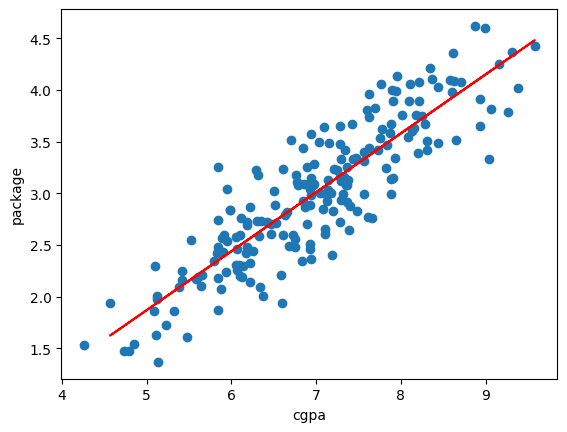

In [33]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
y_pred = lr.predict(X_test)

# Mean Absolute Error

In [38]:
print("MAE : ",mean_absolute_error(y_test,y_pred))

MAE :  0.2606898249919377


# Mean Squared Error

In [39]:
print("MSE : ", mean_squared_error(y_test,y_pred))

MSE :  0.09995369482155111


# Root Mean Squared Error

In [40]:
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  0.3161545426236212


# R2 Score

In [41]:
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.7525945592908275


# Adjusted r2_score

In [44]:
print("Adjusted R2 Score : ", 1 - (((1-r2_score(y_test,y_pred))*(60-1))/(60-1-2)))

Adjusted R2 Score :  0.7439136666343653


# Checking Adjusted R2 score with irrelevant column

In [50]:
df1 = df.copy()
df1['random_feature'] = np.random.random(len(df))

df1 = df1[['cgpa','random_feature','package']]
df1.head()

,cgpa,random_feature,package
0,6.89,0.399523,3.26
1,5.12,0.282082,1.98
2,7.82,0.017510,3.25
3,7.42,0.783350,3.67
4,6.94,0.841354,3.57


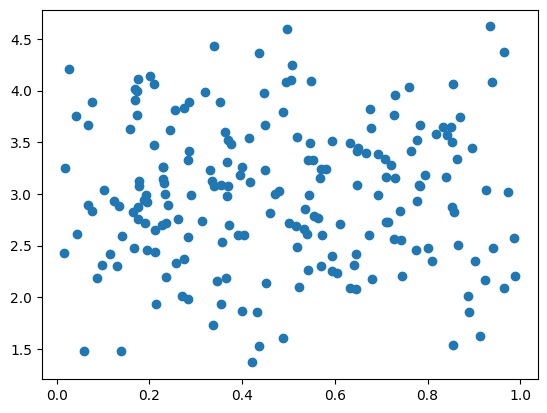

In [51]:
plt.scatter(df1.random_feature,df1.package)
plt.show()

In [54]:
X = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.7329085229382895


In [61]:
print("Adjusted R2 Score : ", 1 - (((1-r2_score(y_test,y_pred))*(60-1))/(60-1-2)))

Adjusted R2 Score :  0.7235368921641944


# Checking Adjusted R2 score with relevant column

In [62]:
df2 = df.copy()
df2['iq'] = df2['package'] + (np.random.randint(-12,12,len(df))/10)

df2 = df2[['cgpa','iq','package']]
df2.head()

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,1.98,1.98
2,7.82,2.25,3.25
3,7.42,4.67,3.67
4,6.94,3.77,3.57


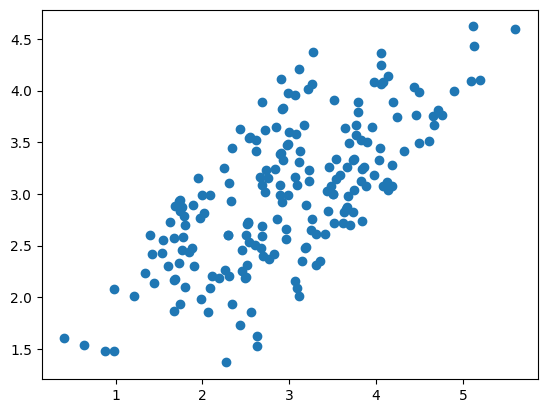

In [64]:
plt.scatter(df2.iq,df2.package)
plt.show()

In [65]:
X = df2.iloc[:,0:2]
y = df2.iloc[:,-1]

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.8121918551437615


In [71]:
print("Adjusted R2 Score : ", 1 - (((1-r2_score(y_test,y_pred))*(60-1))/(60-1-2)))

Adjusted R2 Score :  0.8056020956751215
